In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.cluster import KMeans
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
wcss = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

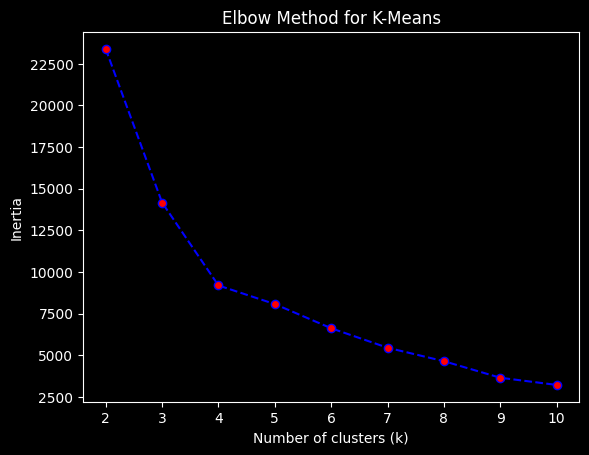

In [4]:
plt.plot(
    range(2, 11),
    wcss,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

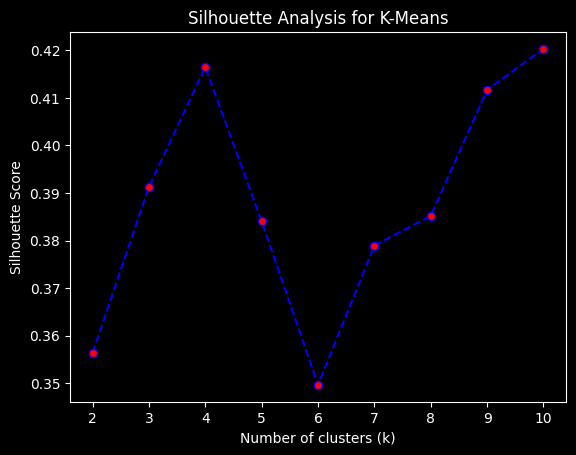

In [5]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.show()

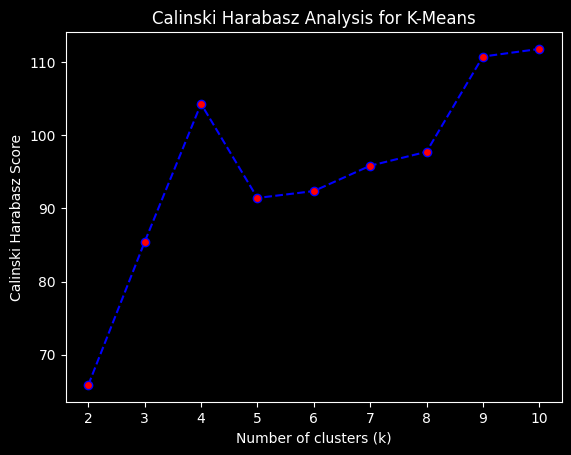

In [6]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for K-Means")
plt.show()

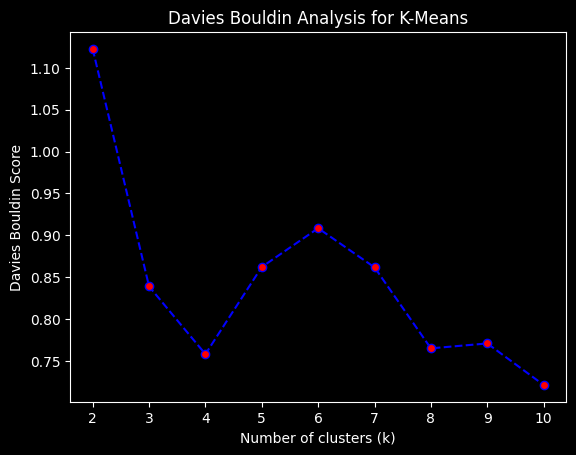

In [7]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for K-Means")
plt.show()

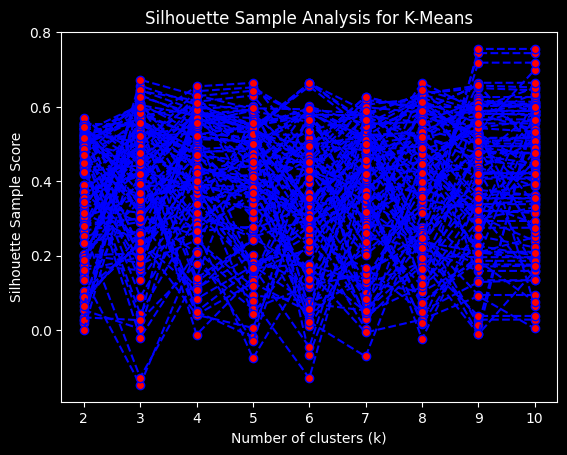

In [8]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for K-Means")
plt.show()

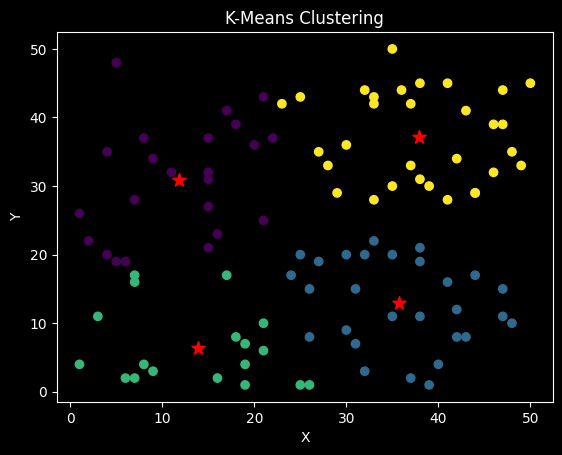

In [9]:
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker=MarkerStyle("*"), c="red", s=100)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
print("WCSS (Inertia) :", kmeans.inertia_)
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

WCSS (Inertia) : 9377.843562857588
Silhouette Score : 0.4119892439831569
Calinski Harabasz Score : 101.49702749984037
Davies Bouldin Score : 0.758263576979122
Silhouette Samples : [ 0.54359099  0.51267909  0.5862364   0.53636411  0.52512852  0.13904102
  0.54012089  0.60133147  0.20237924  0.48401881  0.28299116  0.52422925
  0.62804161  0.61769168  0.20157659  0.63436006  0.54972032  0.36633671
  0.59376915  0.49884421  0.34347547  0.63310929  0.40993547  0.38488116
  0.60812844  0.23279896  0.63428178  0.29502427  0.13675178  0.59032963
  0.52730988  0.60597406  0.52461052  0.45479737  0.58550092  0.49462992
  0.37114832  0.6058787   0.41591084  0.19792095 -0.03710884  0.5169523
  0.60117593  0.62845524  0.04958821  0.45608035  0.12485339  0.1685025
  0.42639467  0.40989007  0.43915468  0.33138375  0.44787716  0.50305268
  0.60528324  0.58591839  0.05734419  0.51255083  0.30400229  0.50648891
  0.1280662   0.58213323  0.15187533  0.40742858  0.50190856  0.52763903
  0.00714647  0.238

In [11]:
dump(kmeans, "../../../Models/k-MeansCluster.joblib")

['../../../Models/k-MeansCluster.joblib']